# Midsemester Project 
## INFO Midterm: COVID-19 Government Responses and Mobility
### Data Manipulation and Visualization
Joshua Hong (jh976), Catherine Cai (cc2563), Ahmad Bhatti (mab558)

['-73%', '-72%', '-72%', '-72%', '-61%']


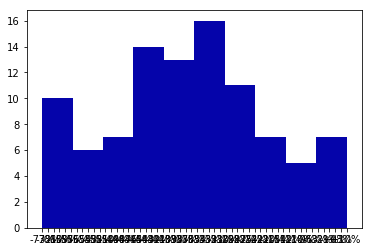

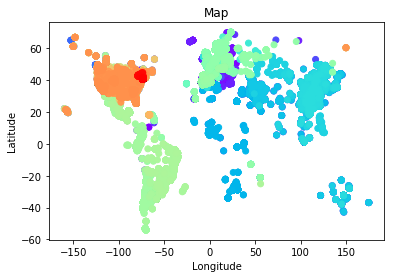

In [3]:
# Using two datasets, one from Google and one from HDX, we will be visualizing mobility data and government policy orders since the beginning of the coronavirus pandemic late last year.
# datasets used: https://www.kaggle.com/kerneler/starter-google-mobility-a40c0cad-8; df2 is from https://github.com/beoutbreakprepared/nCoV2019

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import datetime
import os
#print(os.getcwd())
#os.listdir()


#gotta upload the data
df1=pd.read_csv('mobility_google.csv')
df2=pd.read_csv('nCoV2019-master/latest_data/latestdata.csv')

df1.head(10)

dataTypeSeries = df1.dtypes

#print('Data type of each column of Dataframe :')
#print(dataTypeSeries)


X = pd.DataFrame(df1,columns=['Country','Retail & recreation','Grocery & pharmacy','Workplaces', 'Residential']) #Name columns according to sklearn API

#sorting percentages by converting to float, sorting, then putting the '%' back
df_w = X['Workplaces']
temp = [] #temporary list
for key in df_w:
    temp.append((key[:-1]))
for key in temp:
    if type(key) != float:
        temp.remove(key)
temp = sorted(temp, key = float)
output = [] #output is the sorted percentages
# Adding percentage sign
for key in temp:
    output.append(key + '%')
print(output[:5])


n, bins, patches = plt.hist(x=output, bins=10, color='#0504aa')
plt.show() 


#df2.head(10)


df2 = df2.dropna(subset=['date_confirmation'], axis=0) #only rows with dates in this column
#df2.head(5)


colors = plt.cm.rainbow(np.linspace(0, 1, len(df2['date_confirmation'])))
#print(len(df2['date_confirmation']))
plt.scatter(df2['longitude'],df2['latitude'],c= colors, cmap= plt.cm.Paired)

plt.title('Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [101]:
df=pd.read_csv('mobility_google.csv')

In [112]:
#making values in Retail & recreation into floats
avg_rr_lst= []
lst = []
for x in range(0,len(df)):
    r = (df['Retail & recreation'][x]).replace("%", "")
    lst.append(r)
for x in range(0, len(lst)): 
    avg_rr_lst.append(float(lst[x]))

In [113]:
#making values in Grocery & pharmacy into floats
avg_gp_lst= []
lst1 = []
for x in range(0,len(df)):
    r = (df['Grocery & pharmacy'][x]).replace("%", "")
    lst1.append(r)
for x in range(0, len(lst1)): 
    try:
        avg_gp_lst.append(float(lst1[x]))
    except ValueError: 
        y = 0.0
        avg_gp_lst.append(float(y))

In [114]:
#making values in Parks into floats
avg_p_lst= []
lst2 = []
for x in range(0,len(df)):
    r = (df['Parks'][x]).replace("%", "")
    lst2.append(r)
for x in range(0, len(lst2)): 
    try:
        avg_p_lst.append(float(lst2[x]))
    except ValueError: 
        y = 0.0
        avg_p_lst.append(float(y))

In [115]:
#making values in Transit stations into floats
avg_ts_lst= []
lst3 = []
for x in range(0,len(df)):
    r = (df['Transit stations'][x]).replace("%", "")
    lst3.append(r)
for x in range(0, len(lst3)): 
    try:
        avg_ts_lst.append(float(lst3[x]))
    except ValueError: 
        y = 0.0
        avg_ts_lst.append(float(y))

In [116]:
#making values in Workplaces into floats
avg_w_lst= []
lst4 = []
for x in range(0,len(df)):
    r = (df['Workplaces'][x]).replace("%", "")
    lst4.append(r)
for x in range(0, len(lst4)): 
    try:
        avg_w_lst.append(float(lst4[x]))
    except ValueError: 
        y = 0.0
        avg_w_lst.append(float(y))

In [117]:
#making values in Residental into floats
avg_res_lst= []
lst5 = []
for x in range(0,len(df)):
    r = (df['Residential'][x]).replace("%", "")
    lst5.append(r)
for x in range(0, len(lst5)): 
    try:
        avg_res_lst.append(float(lst5[x]))
    except ValueError: 
        y = 0.0
        avg_res_lst.append(float(y))

In [120]:
# cleaned dataset
clean_data = pd.DataFrame({
                    'Country': df['Country'],
                    'Retail & recreation': avg_rr_lst,
                    'Grocery & pharmacy': avg_gp_lst,
                    'Parks': avg_p_lst,
                    'Transit stations': avg_ts_lst,
                    'Workplaces': avg_w_lst,
                    'Residential': avg_res_lst
                   })
#cleaned each state
clean_data = clean_data.drop(clean_data.index[136:187]) 

-36.99295774647887

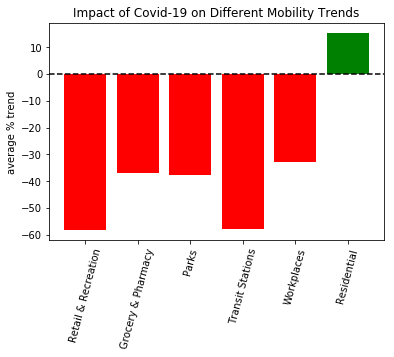

In [189]:
bar1 = (clean_data['Retail & recreation']).mean()
bar2 = (clean_data['Grocery & pharmacy']).mean()
bar3 = (clean_data['Parks']).mean()
bar4 = (clean_data['Transit stations']).mean()
bar5 = (clean_data['Workplaces']).mean()
bar6 = (clean_data['Residential']).mean()

x= ['Retail & Recreation','Grocery & Pharmacy', 'Parks', 'Transit Stations', 'Workplaces', 'Residential']
y= [bar1,bar2,bar3,bar4,bar5,bar6]
num = np.arange(len(x))

plt.bar(num,y,align='center',color= ["red","red","red","red","red","green"])

plt.title('Impact of Covid-19 on Different Mobility Trends')
plt.xticks(num,x,rotation= 75)
plt.ylabel('average % trend')

point_of_ref = 0.0
plt.axhline(y=point_of_ref, linestyle='--', color='k')

plt.show()

# Write up
### Questions
What can we observe from looking at times of Covid-19 outbreaks on a map?<br>
What kind of impact has the Covid-19 pandemic had on mobility trends?

### So why? (Map/scatter plot) 
For trends it is important to look at where and when things are happening. It is important to look at trends through the lens of time because it will allow to those trends in a more holistic light. In order to visualize something that could be hard through just bars and numbers, we decided to plot them as a map. We incorporated the longitude and latitude with recent outbreaks during the Covid-19 pandemic. The scatter plot/map above operates similar to that of a heatmap, but one that is plotted according to times of outbreaks. The blue and lighter colors represent outbreaks that occured earlier while the red and orange colors represent the recent places that have been affected. This visualization allows important insights such as confirmed cases seem to appear in chunks or clusters, which makes sense when taking into consider that viruses spread rapidly when many interact with those who are infected in tight clusters. This is shown most evidently, in the map, in an area that resembles New York, a city where close interaction is bound to happen and consequently lead to a quick spread in clusters. 

### So why? (Bar graph)
When looking at a society many things are revealed through the ways those within the society travel, move, and interact with their environment. For that reason, we believe that asking how the Covid-19 has effected those aspects of life and sorting them into different categories will allow us to gain a better understanding by seeing the percent effect per category. Since our other visualization focuses on the impact per country we decided to use the second visualization to focus more on the differing categories Google identified per every country they created a stastic on. A bar graph was the most clear and easy way to present our found insights, so as seen above, we created a bar graph where the red represents a decrease in the trend while the green represents a increase in certain trends. Also we decided to use the mean of each trend to show the % increase or decrease in our best attempts to capture what is happening to these trends in relation to the world. It is evident that most trends were hit quite largely, and only the residential trend seems to have increased, which makes sense as most countries are trying to keep their citizens inside. 